<a href="https://colab.research.google.com/github/Leir-Cruz/processamento-de-imagens/blob/main/Trabalho2ProcessamentodeImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, datasets
import cv2 as cv

### Leitura da imagem

array([[  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       ...,
       [255, 187,   0, ..., 119, 238, 238],
       [255, 187,   0, ..., 255, 255, 255],
       [255, 187,   0, ..., 255, 255, 255]], dtype=uint8)
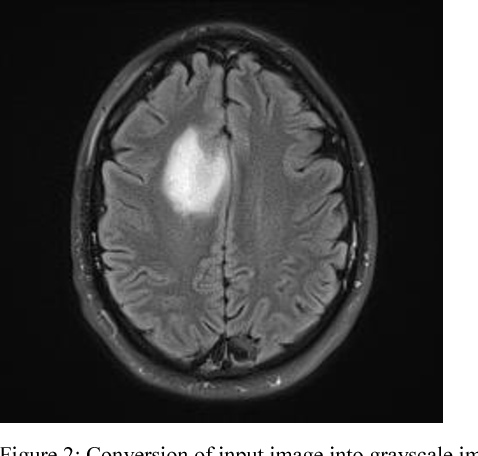

In [ ]:
brain_img = cv.imread("/content/brain.png")
gray_brain = cv.cvtColor(brain_img, cv.COLOR_BGR2GRAY)
gray_brain


### Aplicando filtro passa baixas e mediana para remoção de ruído

array([[  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       ...,
       [131, 138, 139, ..., 167, 194, 202],
       [131, 136, 130, ..., 157, 195, 209],
       [131, 136, 130, ..., 163, 213, 232]], dtype=uint8)
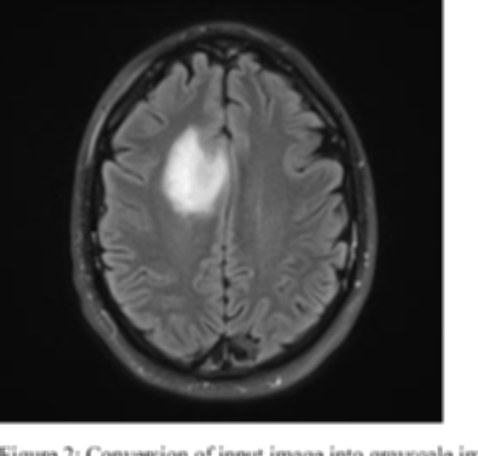

In [ ]:
filtered_image = cv.GaussianBlur(gray_brain, (5,5),cv.BORDER_DEFAULT)
filtered_image

array([[  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       ...,
       [136, 131, 136, ..., 183, 195, 202],
       [136, 131, 133, ..., 166, 194, 202],
       [136, 131, 131, ..., 157, 194, 209]], dtype=uint8)
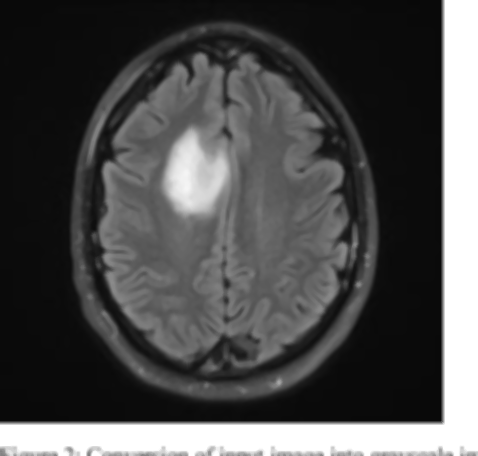

In [ ]:
filtered_with_median = ndimage.median_filter(filtered_image, size=4)
filtered_with_median

### Histograma da imagem

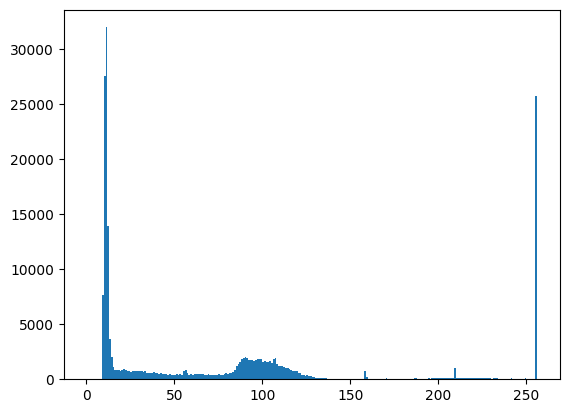

In [ ]:
plt.hist(filtered_with_median.ravel(),256,[0,256])
plt.show()

### Conclusões histograma
Queremos dividir a imagem entre: tumor e não tumor. Com base nisso, podemos dividir a imagem no limir próximo ao 250 (branco no rgb = 255,255,255). No entanto, isso não irá nos retornar o resultado esperado, tendo em vista que os pixeis do tumor não são exatamente brancos.

### Imagem binárizada

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255]], dtype=uint8)
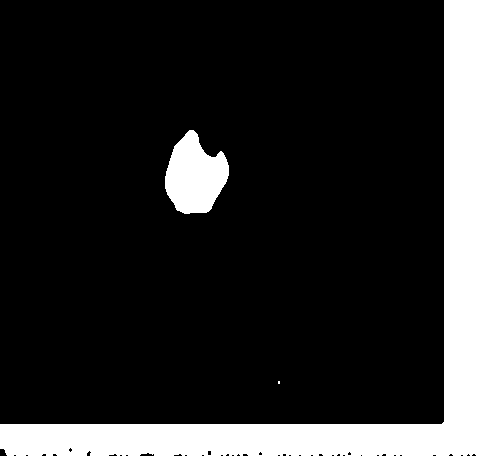

In [ ]:
ret,th1 = cv.threshold(filtered_with_median,160,255,cv.THRESH_BINARY)
th1

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
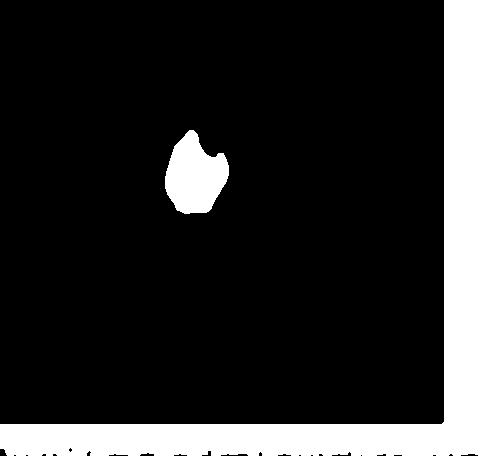

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
opening = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel)
opening

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
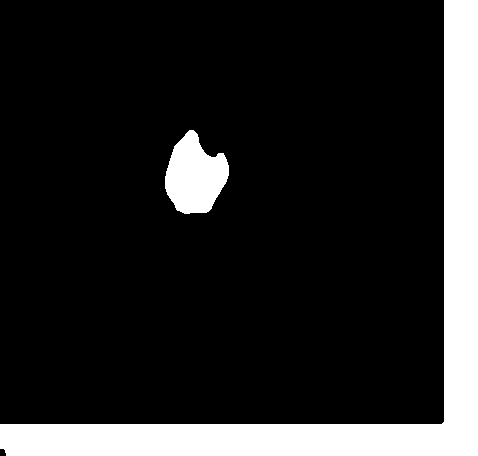

In [ ]:
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
closing

### Detecção de borda utilizando Canvy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
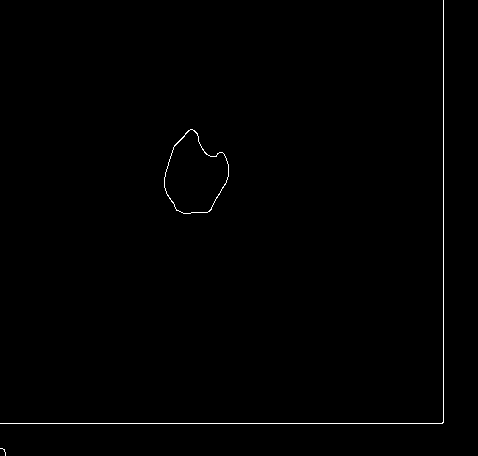

In [ ]:
edges = cv.Canny(closing,100,200)
edges

array([[  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       [  9,   9,   9, ..., 255, 255, 255],
       ...,
       [255, 187,   0, ..., 119, 238, 238],
       [255, 187,   0, ..., 255, 255, 255],
       [255, 187,   0, ..., 255, 255, 255]], dtype=uint8)
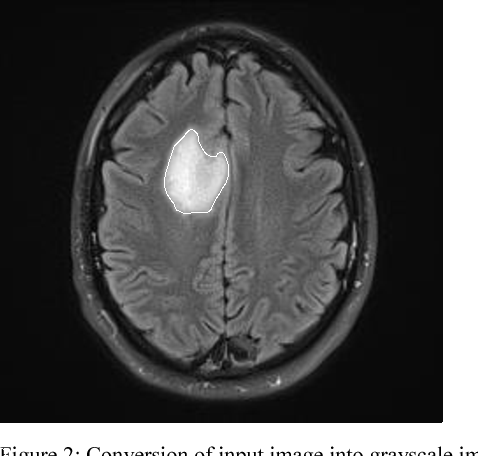

In [ ]:
tumor_image = cv.add(gray_brain,edges)
tumor_image

### Leitura cebolas

array([[[ 63,  35,  64],
        [ 67,  35,  66],
        [ 65,  32,  64],
        ...,
        [ 78,  46,  74],
        [ 77,  45,  72],
        [ 71,  44,  70]],

       [[ 61,  37,  66],
        [ 61,  35,  64],
        [ 64,  34,  64],
        ...,
        [ 78,  46,  75],
        [ 79,  47,  77],
        [ 78,  46,  77]],

       [[ 61,  36,  61],
        [ 61,  36,  60],
        [ 64,  37,  64],
        ...,
        [ 73,  48,  70],
        [ 74,  49,  72],
        [ 77,  45,  74]],

       ...,

       [[255, 123,   0],
        [254, 117,   0],
        [249, 109,   0],
        ...,
        [255, 173,   0],
        [255, 173,   0],
        [255, 171,   0]],

       [[255, 121,   0],
        [254, 118,   0],
        [250, 111,   0],
        ...,
        [255, 172,   0],
        [255, 170,   0],
        [255, 170,   0]],

       [[255, 120,   0],
        [255, 119,   0],
        [253, 115,   0],
        ...,
        [255, 169,   0],
        [255, 167,   0],
        [255, 167,   0]]], dtype=uint8)
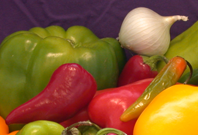

In [ ]:
onion_img = cv.imread("/content/onion.png")
onion_img = cv.cvtColor(onion_img, cv.COLOR_BGR2RGB)
onion_img

### Pré-processamento de imagem

#### Função suavizar imagem

In [ ]:
def smooth_image(image, kernel_size):
  return cv.GaussianBlur(image, (kernel_size, kernel_size), 0)

### Função para rodar k-means na imagem

In [ ]:
def kmeansClustering(image, k, criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.90) ):
  Z = image.reshape((-1,3))
  Z = np.float32(Z)
  ret,label,center=cv.kmeans(Z,k,None,criteria,100,cv.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((image.shape))
  return res2



#### Função para destacar mascará na imagem original

In [ ]:
def get_mask_result(image, mask_generated):
  edges = cv.Canny(closing,100,200)
  return cv.add(cv.cvtColor(image, cv.COLOR_RGB2GRAY),edges)


### Encontrando melhor segmentação para a cebola

array([[[ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58],
        ...,
        [ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58]],

       [[ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58],
        ...,
        [ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58]],

       [[ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58],
        ...,
        [ 68,  42,  58],
        [ 68,  42,  58],
        [ 68,  42,  58]],

       ...,

       [[209,  69,  49],
        [209,  69,  49],
        [209,  69,  49],
        ...,
        [250, 191,  17],
        [250, 191,  17],
        [250, 191,  17]],

       [[209,  69,  49],
        [209,  69,  49],
        [209,  69,  49],
        ...,
        [250, 191,  17],
        [250, 191,  17],
        [250, 191,  17]],

       [[209,  69,  49],
        [209,  69,  49],
        [209,  69,  49],
        ...,
        [250, 191,  17],
        [250, 191,  17],
        [250, 191,  17]]], dtype=uint8)
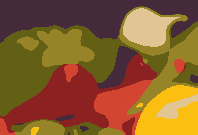

In [ ]:
onion_color_quantitazed = kmeansClustering(smooth_image(onion_img, 13),7)
onion_color_quantitazed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
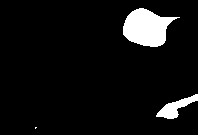

In [ ]:
mask = cv.cvtColor(onion_color_quantitazed, cv.COLOR_RGB2GRAY)
ret,th1 = cv.threshold(mask,190,255,cv.THRESH_BINARY)
th1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
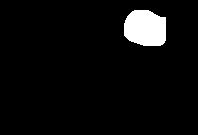

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(13,13))
opening = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel)
opening

### Encontrando melhor para o pimentão

array([[[ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65],
        ...,
        [ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65]],

       [[ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65],
        ...,
        [ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65]],

       [[ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65],
        ...,
        [ 68,  41,  65],
        [ 68,  41,  65],
        [ 68,  41,  65]],

       ...,

       [[200, 111,  16],
        [200, 111,  16],
        [200, 111,  16],
        ...,
        [252, 190,   9],
        [252, 190,   9],
        [252, 190,   9]],

       [[200, 111,  16],
        [200, 111,  16],
        [200, 111,  16],
        ...,
        [252, 190,   9],
        [252, 190,   9],
        [252, 190,   9]],

       [[200, 111,  16],
        [200, 111,  16],
        [200, 111,  16],
        ...,
        [252, 190,   9],
        [252, 190,   9],
        [252, 190,   9]]], dtype=uint8)
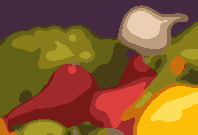

In [ ]:
pepper_color_quantitazed = kmeansClustering(smooth_image(onion_img, 15),14)
pepper_color_quantitazed